In [1]:
import h5py as h5  
import pandas as pd
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [3]:
SNs_2 = Data_2['BSE_Supernovae'] #specifically looking at the supernovae events
# list(SNs_2.keys()) #listing the parameters recorded for each supernova

Finding the distribution of types of supernovae in this output

In [4]:
# looking for the actual list of supernovae types 
super_types_LM = SNs_2['SN_Type(SN)'][()]
print(super_types_LM.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
NONE = 0
CCSN = 0
ECSN = 0
PISN = 0
PPISN = 0
USSN = 0
AIC = 0
SNIA = 0
HeSD = 0

#looping through the supernova events and adding to the counters for each occurence

for super in super_types_LM:
    if super==0:
        NONE+=1
    elif super==1:
        CCSN+=1
    elif super==2:
        ECSN+=1
    elif super==4:
        PISN+=1
    elif super==8:
        PPISN+=1
    elif super==16:
        USSN+=1
    elif super==32:
        AIC+=1
    elif super==64:
        SNIA+=1
    elif super==128:
        HeSD+=1

#printing the final number of each type of supernova

print("NONE=",NONE)
print("CCSN=",CCSN)
print("ECSN=",ECSN)
print("PISN=",PISN)
print("PPISN=",PPISN)
print("USSN=",USSN)
print("AIC=",AIC)
print("SNIA=",SNIA)
print("HeSD=",HeSD)


(62701,)
NONE= 0
CCSN= 58769
ECSN= 1431
PISN= 33
PPISN= 953
USSN= 1515
AIC= 0
SNIA= 0
HeSD= 0


Looking at this output as a histogram

In [5]:
# this may be silly but this is to be able to label each type of sn type using the legend

super_types_LM_array = np.array(super_types_LM)

# making empty lists to hold each type
sn_0 = []
sn_1 = []
sn_2 = []
sn_4 = []
sn_8 = []
sn_16 = []
sn_32 = []
sn_64 = []
sn_128 = []

# looping through all of the seeds
for s in super_types_LM_array:

# specifying the case for each type

    if s==0:
        sn_0.append(s)

    if s==1:
        sn_1.append(s)

    if s==2:
        sn_2.append(s)

    if s==4:
        sn_4.append(s)

    if s==8:
        sn_8.append(s)

    if s==16:
        sn_16.append(s)

    if s==32:
        sn_32.append(s)

    if s==64:
        sn_64.append(s)

    if s==128:
        sn_128.append(s)


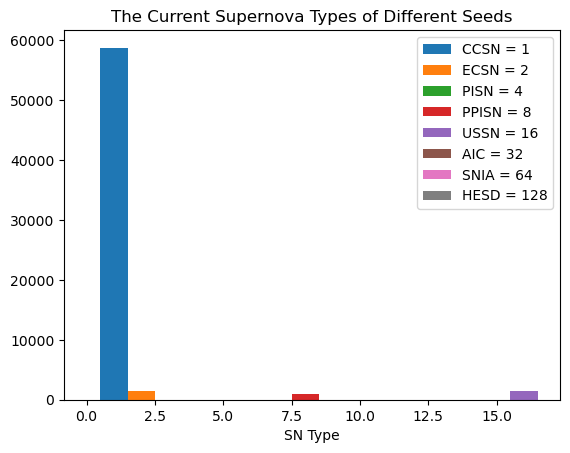

In [6]:
plt.hist(sn_1, bins='auto', label="CCSN = 1");
plt.hist(sn_2, bins='auto', label="ECSN = 2");
plt.hist(sn_4, bins='auto', label="PISN = 4");
plt.hist(sn_8, bins='auto', label="PPISN = 8");
plt.hist(sn_16, bins='auto', label="USSN = 16");
plt.hist(sn_32, bins='auto', label="AIC = 32");
plt.hist(sn_64, bins='auto', label="SNIA = 64");
plt.hist(sn_128, bins='auto', label="HESD = 128");
plt.xlabel("SN Type")
plt.title("The Current Supernova Types of Different Seeds")
plt.legend()

Using astropy.table to look at different properties of stars that should produce supernovae

In [9]:
# now looking at the roche lobe overflow (mass transfer)
RLOF_LM = Data_2['BSE_RLOF']

#reading in the data as a table to make it more readable

OG_RLOF_TABLE = Table(RLOF_LM)
# RLOF_LM_table

In [10]:
# selecting where star 1 is originally a white dwarf (WD)
is_WD_init_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 12)
OG_RLOF_TABLE_WD = OG_RLOF_TABLE[is_WD_init_bool]
# selecting where star 1 is the accretor (gaining mass)
RLOF_LM_table_1_accret = OG_RLOF_TABLE_WD[OG_RLOF_TABLE_WD["RLOF(2)>MT"]==1]
RLOF_LM_table_1_accret

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,1,0.0,0.0,3.2077856378207976e-05,28.778335310680333,2,0.4848937726466166,0.4848937726466166,1.0457422241252674,0.20698902941172218,1.6032742342694144,1,0.0009079700166705884,0,0,0,1,0.014464663189015473,0.014464663189015473,0.004792510096679771,0.7801109381741677,4.334884520578072,0.021110763599141918,1.011908718158736,1.6776725130004575,1,900008,9.589618752748802,0.04083329383986907,10,10,3,10,3615.5528102441604,92106.86133279861,5413.907595698666,5418.29690990891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1,0.0,0.0,1.552906004409779e-05,155.5641078948597,2,0.1467918079177086,0.1467918079177086,1.1674503262743623,0.3383283364508429,367.0455478036649,0,0.01805939637061457,0,0,0,1,0.024024625236980197,0.024024625236980197,0.0015824844972598619,0.043413517483411684,38.80090835187925,0.01723301516129598,1.008667681361284,0.021289716708546774,1,900010,68.72364529045993,1.7883025663108172,10,10,3,10,2340.105939545198,155444.10373934248,10654.471493186255,10654.693252880674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.1819242725908363e-17,0,0.0,0.0,2.6185956682334043e-06,24.730467530210284,2,0.8876201687585465,0.8876201687585465,1.0352744909484257,0.36791807948869976,234.6607700731949,0,0.0001475633987143172,0,0,0,1,0.009317026996987382,0.009317026996987382,0.0003952370292026298,0.00011775251948243853,25.453400266981195,0.01658916128848528,1.0064549985523445,0.0003130762607455443,1,900016,64.46453340000616,173.24944396103658,11,11,3,10,2407.9971680922476,100039.9358114858,5102.595978822963,5102.9121375683335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.7317636588519773e-22,1,0.0,0.0,0.029220508404768922,95.60199767376072,2,0.9810455335118108,0.9810455335118108,5.800472007054785,1.0956426489411404,79357.74419944645,0,0.0289321153912559,0,0,0,1,0.008271267405677104,0.008271267405677104,3.433517989644132e-05,0.00013747216669400243,539.2853032408074,0.00696127452621558,1.0052844196483148,0.00011000435778395138,1,900023,1002.6049843762789,162.87877191205507,11,11,6,11,26267.17991151445,216545.86681333347,117.94047387406353,117.94547387406352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.4244429343270145e-18,1,0.0,0.0,0.0011993069039261718,2145.606018988237,3,1.3090592487671473,1.3090592487671473,4.753591402866659,1.522356906777668,1852.8157058611882,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101456585457414,0.00010720299377173505,0.01011518465169014,68.69051975853246,0.29063898705044344,1.0004643690832113,0.6690190461378616,1,900025,139.28899788780603,1.1080725449094813,11,11,4,7,16789.627526126988,72943.75171203354,112.91955037926353,112.94285970099152,0.0,-0.1499270958837559,0.0,0.0,0.0,-0.3333333333333333,0.0,0.0
2.285110280997332e-07,0,0.0,0.0,0.0011870859412051024,8.233740216874244,4,1.3090592487671473,1.309059426184703,1.5222238796635028,0.7458169063901713,36.89892912579361,0,0.0001647393829398977,0,0,0,1,0.004101456585457414,0.004101453666147036,0.010114502790788201,0.0049369474919023874,0.4375174597471506,0.010943885842979395,1.0070894764714173,0.017028048993157456,1,900025,1.

In [11]:
# let's name the columns that relate to the stellar mass of a system

init_mass_WD = RLOF_LM_table_1_accret['Mass(1)<MT']
final_mass_WD = RLOF_LM_table_1_accret['Mass(1)>MT']

wd_mass_change = final_mass_WD - init_mass_WD

/tmp/ipykernel_1142577/1678347202.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


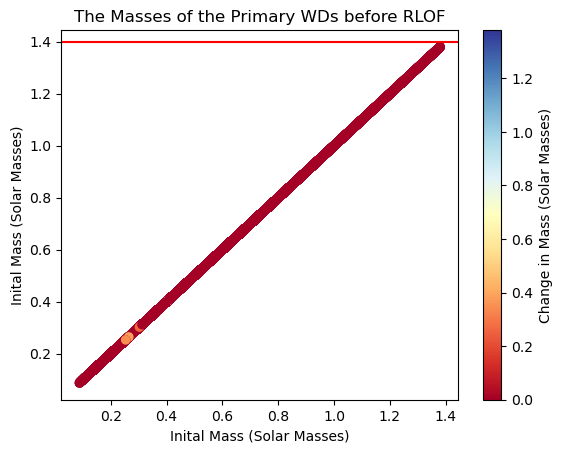

In [12]:
# plotting for the inital mass of the primary WDs
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(init_mass_WD, init_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(init_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs before RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

/tmp/ipykernel_1142577/3772858263.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


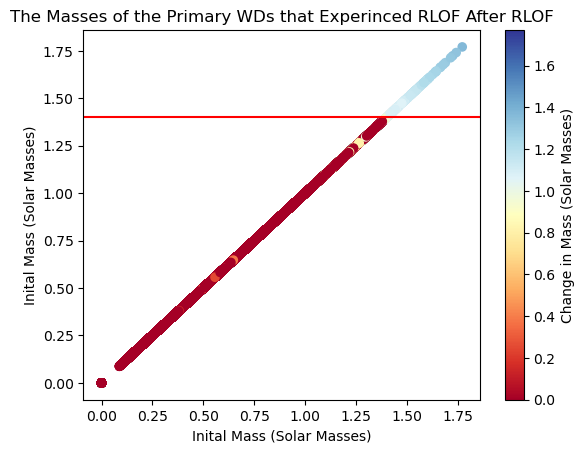

In [13]:
# plotting for the final mass of the stars that were originally WDs 
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(final_mass_WD, final_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(final_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs that Experinced RLOF After RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

There are a few WDs that are above 1.4 solar masses in their final state (as shown in the plot above). Let's do more analysis on the WDs above 1.4 solar masses to see how they evolve and why they do not produce a Type Ia supernova. Let's specifically look at the final stellar type of these stellar objects that exceeded 1.4 solar masses.

In [33]:
# this is more of a sanity check because there should be no WDs with masses above 1.4 solar masses as seen in the first plot
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((init_mass_WD>=1.4))
RLOF_LM_wd_init_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_init_table_types['Stellar_Type(1)<MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs before RLOF and were more massive than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(0,)
The number of primary stellar objects that were white dwarfs before RLOF and were more massive than 1.4 Solar Masses = 0
The number of primary stellar objects that were helium white dwarfs and were more massive than 1.4 Solar Masses = 0
The number of primary stellar objects that were carbon/oxygen white dwarfs and were more massive than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and were more massive than 1.4 Solar Masses = 0


In [35]:
# this looking at what these initally WDs that surpassed 1.4 solar masses became
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((final_mass_WD>=1.4))
RLOF_LM_wd_final_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_final = RLOF_LM_wd_final_table_types['Stellar_Type(1)>MT']
print(WD_types_LM_final.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_final_array = np.array(WD_types_LM_final)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_final_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF and were more massive than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and were more massive than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(141,)
The number of primary stellar objects that were white dwarfs after RLOF and were more massive than 1.4 Solar Masses = 141
The number of primary stellar objects that were helium white dwarfs and were more massive than 1.4 Solar Masses = 141
The number of primary stellar objects that were carbon/oxygen white dwarfs and were more massive than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and were more massive than 1.4 Solar Masses = 0


We can look the initia and final radius of the WD

Text(0.5, 1.0, 'The Mass and Period of the Primary Star Before RLOF')

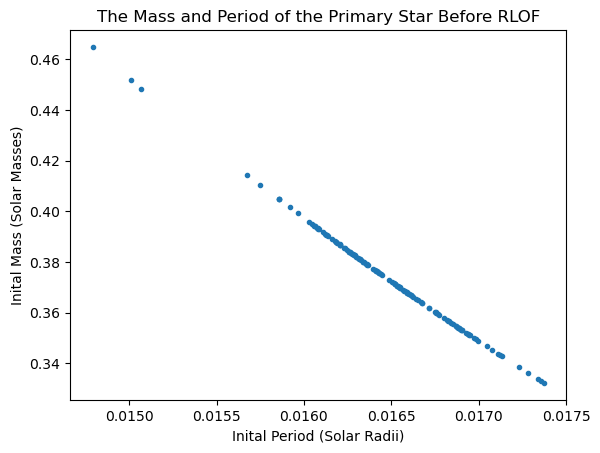

In [30]:
# let's look at the inital period of these WDs

# selecting columns out of our sliced data
init_period_1 = RLOF_LM_wd_final_table_types['Radius(1)<MT']
init_mass_init = RLOF_LM_wd_final_table_types['Mass(1)<MT']

plt.plot(init_period_1,init_mass_init,'.')
plt.xlabel("Inital Period (Solar Radii)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star Before RLOF")

Text(0.5, 1.0, 'The Mass and Period of the Primary Star After RLOF')

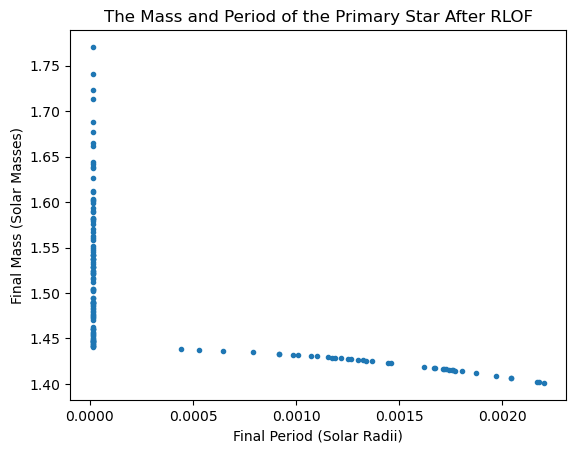

In [31]:
# now let's look at the final period and mass
final_period_1 = RLOF_LM_wd_final_table_types['Radius(1)>MT']
final_mass_final = RLOF_LM_wd_final_table_types['Mass(1)>MT']

plt.plot(final_period_1,final_mass_final,'.')
plt.xlabel("Final Period (Solar Radii)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Mass and Period of the Primary Star After RLOF")

We can see that for masses above 1.4 solar masses, the radii get smaller and tend off to neutron star ordered radii (~10km). These are also masses above 1.4 solar masses, so these WDs (or some of them) should be categorized as neutron stars, but they are not. 

Below is the table of SEEDs that contain WDs that are expected to have experienced a Type Ia supernova but did not. 

In [32]:
RLOF_LM_wd_final_table_types

Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
float64,uint8,float64,float64,float64,float64,uint32,float64,float64,float64,float64,float64,uint8,float64,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,0,0.0,0.0,0.00036709670599479065,76.66103657070684,2,0.35321860176764874,1.4480166027088313,1.2427714977981443,0.14797349685696173,0.25671330039601314,0,0.02433618689745945,0,0,0,1,0.016902031138489638,1.4285714285714285e-05,0.012096984057000205,1.1931457982486177e-06,2.4790216131433382,0.023954063134668347,1.002731658516623,0.005542484917758875,1,611830,5.043956712890345,20.77042782590607,10,10,2,10,211602.93119633012,110466.75951388064,5366.081746441814,5379.805740678238,0.0,0.0,-0.30990006127731345,0.0,0.0,0.0,0.046064533389899874,0.0
1.0,0,0.0,0.0,0.0002740828448970177,76.06241903956295,2,0.3811324053168883,1.454622667335866,1.2252404647201351,0.15175020270115738,0.255827833432674,0,0.02240669435373954,0,0,0,1,0.016318588533170805,1.4285714285714285e-05,0.011097045589588352,1.0907508909864723e-06,2.5212958473843026,0.023733138817871112,1.0089551656124311,0.004975886059166775,1,613275,5.182512771779855,22.78515264310417,10,10,2,10,196696.67604504272,110762.43152997555,5564.582648538762,5578.705954753327,0.0,0.0,-0.3057918417661144,0.0,0.0,0.0,0.07471010609513172,0.0
1.0,0,0.0,0.0,0.0004283094795269573,56.713310284199935,2,0.3826278824429397,1.5283679105072352,1.2956110809877983,0.1498710529235027,0.4144432539090675,0,0.01109669765816591,0,0,0,1,0.01628856494513003,1.4285714285714285e-05,0.011953945084016494,1.10182165840209e-06,2.395444813418362,0.023842201919860716,1.0107210941441842,0.005185071476495988,1,613800,4.868932491398044,22.36531637544156,10,10,2,10,219920.63414777053,102689.39754726154,3767.4605550788865,3777.3489029898547,0.0,0.0,-0.28599427298402696,0.0,0.0,0.0,0.05616356760622952,0.0
1.0,0,0.0,0.0,0.0004498476022826086,42.120134196928696,2,0.38088658876870496,1.4861334650432112,1.2658152156669542,0.16056833939244805,0.6356405654236762,0,0.004439665317082323,0,0,0,1,0.01632353491164975,1.4285714285714285e-05,0.010319787044419734,1.106962393203009e-06,2.7512211682133585,0.02324270755756928,1.0084101689854845,0.004871677535339871,1,621357,5.623956185729992,22.56129466884482,10,10,2,10,222634.7283488391,96550.96418142937,3418.4378942482426,3425.423562746683,0.0,0.0,-0.2670851111974357,0.0,0.0,0.0,0.0655809288884831,0.0
1.0,0,0.0,0.0,0.0005093245792513811,63.1414422154433,2,0.3713095436068492,1.4829555659387772,1.2775043214835573,0.1658582991516293,0.402242055941692,0,0.01126468057632948,0,0,0,1,0.016518791633073942,1.4285714285714285e-05,0.010213682459765783,1.1827136855627898e-06,2.8445298701065798,0.022964113605323713,1.0039911424866896,0.005066863095951719,1,624434,5.803723186306881,21.21912943110351,10,10,2,10,229654.63569076316,107480.90597351403,4101.4856930313035,4111.869201114928,0.0,0.0,-0.2863228498835541,0.0,0.0,0.0,0.056217526779995364,0.0
1.0,0,0.0,0.0,0.0003896840914658383,77.54197620822399,2,0.35389219456524756,1.4377060993243511,1.2409960363589059,0.15718213159980238,0.27118546119372905,0,0.0215332649418748,0,0,0,1,0.01688740344439802,0.0005302081258887306,0.011397567838717988,4.682258812004482e-05,2.6373826586652838,0

Examples of different SEEDs from this tale and their properties are show below (all of these SEEDs do not produce any supernovae)

SEED 406907

In [22]:
# SEED 406907
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 406907

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
56907,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.825594,1.268637,0,0,0.026567,0.026567,0.0,0.0,0,1,406907,0.343979,0.140562,6.097774,0.670801,-1.173007,-1.370643,4.519426,2.265199,0.848885,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [23]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 406907
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
61754,0.000707,1,0.0,0.0,211.029220,2.474667,1,1.814579,0.393295,1.268637,1.268637,1197.254643,0,0.026567,0,1,0,0,75.672206,0.016078,1.006906,0.010112,1.363468,1.363468,0.021364,0.503893,1,406907,183.189622,5.608217,3,10,1,1,173680.296434,6206.322173,1671.214945,1671.245857,0.0,-0.31552,0.000000,-0.31552,0.0,-0.333333,0.000000,-0.333333
61755,1.000000,0,0.0,0.0,0.000345,84.341471,2,0.393295,1.504357,1.268250,0.157187,0.265519,0,0.026567,0,0,0,1,0.016078,0.000014,0.010109,0.000001,2.721144,0.023427,1.005468,0.004562,1,406907,5.609525,24.519643,10,10,2,10,208368.144774,114401.523243,5200.128999,5213.194650,0.0,0.00000,-0.313077,0.00000,0.0,0.000000,0.073786,0.000000


SEED 290140

In [24]:
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 290140

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
965140,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.847379,1.394381,0,0,0.024352,0.024352,0.0,0.0,0,1,290140,0.068048,0.078967,2.545661,5.565568,0.484585,0.537458,3.5656,2.330114,0.623217,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [25]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 290140
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
1061915,0.00265,1,0.0,0.0,190.093146,4.011901,1,1.840296,0.366831,1.394381,1.394381,554.799403,0,0.024352,0,1,0,0,54.653540,0.016612,1.009376,0.012242,1.604469,1.604469,0.033636,0.645554,1,290140,134.305137,5.001488,3,10,1,1,166460.015880,6455.790348,1582.815580,1582.858146,0.0,-0.311654,0.00000,-0.311654,0.0,-0.333333,0.000000,-0.333333
1061916,1.00000,0,0.0,0.0,0.000789,77.840437,2,0.366831,1.610961,1.394342,0.150212,0.388238,0,0.024352,0,0,0,1,0.016612,0.000014,0.012241,0.000001,2.496716,0.023822,1.004530,0.005378,1,290140,5.001598,21.864491,10,10,2,10,256222.314875,111195.457820,3585.463014,3592.592542,0.0,0.000000,-0.31043,0.000000,0.0,0.000000,0.020829,0.000000


SEED 613275

In [26]:
SYS = pd.DataFrame()
for key in Data_2['BSE_System_Parameters'].keys():
    SYS[key] = Data_2['BSE_System_Parameters'][key][()]

seed_interesting = 613275

pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Unbound,WR_Factor
38275,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0,0,3,0,1.5,1.797777,1.225553,0,0,0.022407,0.022407,0.0,0.0,0,1,613275,0.03187,0.738187,1.296966,0.749642,0.029636,-0.909035,2.002235,3.1286,0.691681,265.0,265.0,30.0,30.0,10,10,1,1,0.0,0,1.0


In [27]:
SYS = pd.DataFrame()
for key in Data_2['BSE_RLOF'].keys():
    SYS[key] = Data_2['BSE_RLOF'][key][()]

seed_interesting = 613275
pd.set_option('display.max_columns', None)
display(SYS[SYS['SEED'] == seed_interesting] )

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
41618,0.000905,1,0.0,0.0,191.036666,2.186394,1,1.788332,0.381132,1.225553,1.225553,806.273889,0,0.022407,0,1,0,0,62.050186,0.016319,1.009400,0.011100,1.283929,1.283929,0.024820,0.513870,1,613275,149.199778,5.181505,3,10,1,1,168157.183169,6200.677231,1695.287965,1695.326920,0.0,-0.308262,0.000000,-0.308262,0.0,-0.333333,0.00000,-0.333333
41619,1.000000,0,0.0,0.0,0.000274,76.062419,2,0.381132,1.454623,1.225240,0.151750,0.255828,0,0.022407,0,0,0,1,0.016319,0.000014,0.011097,0.000001,2.521296,0.023733,1.008955,0.004976,1,613275,5.182513,22.785153,10,10,2,10,196696.676045,110762.431530,5564.582649,5578.705955,0.0,0.000000,-0.305792,0.000000,0.0,0.000000,0.07471,0.000000
